In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Startups+in+2021+end.csv")

## Visualização e tratamento do bando de dados

In [3]:
display(data)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"


In [4]:
data = data.drop(["Unnamed: 0"],axis=1)
display(data)
data.shape

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"


(936, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           936 non-null    object
 1   Valuation ($B)    936 non-null    object
 2   Date Joined       936 non-null    object
 3   Country           936 non-null    object
 4   City              921 non-null    object
 5   Industry          936 non-null    object
 6   Select Investors  935 non-null    object
dtypes: object(7)
memory usage: 51.3+ KB


#### **Células nulas**

In [6]:
data.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

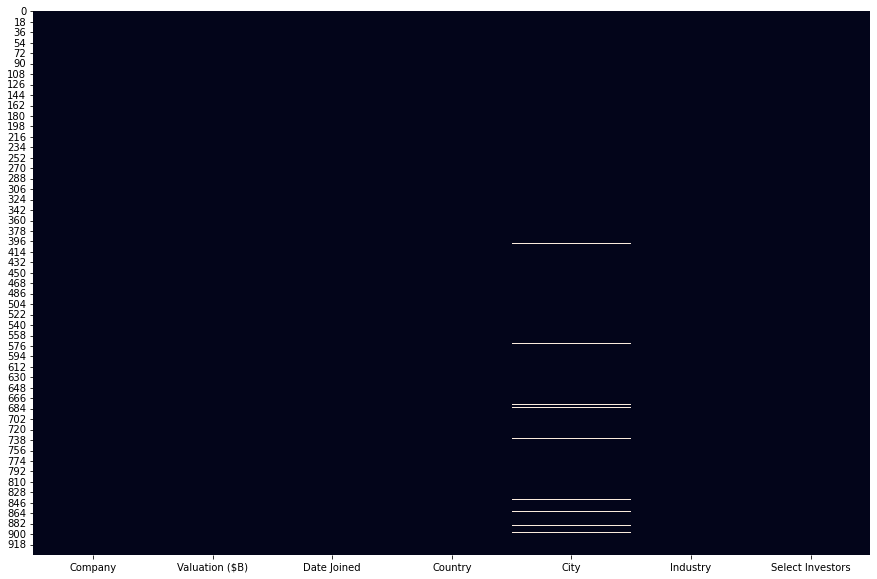

In [7]:
plt.figure(figsize = (15,10))
sns.heatmap(data.isnull(),cbar=False);

In [8]:
#Campos unicos (valores que se repetem em uma coluna)

data.nunique()

Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
dtype: int64

In [9]:
data["Industry"].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [10]:
data["Industry"].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

In [11]:
analise_industry = round(data["Industry"].value_counts(normalize=True)*100,2)
analise_industry

Fintech                                20.30
Internet software & services           17.84
E-commerce & direct-to-consumer        10.90
Artificial intelligence                 7.37
Health                                  6.73
Supply chain, logistics, & delivery     5.45
Other                                   5.45
Cybersecurity                           4.38
Mobile & telecommunications             3.95
Data management & analytics             3.85
Hardware                                3.42
Auto & transportation                   3.10
Edtech                                  2.88
Consumer & retail                       2.46
Travel                                  1.39
Artificial Intelligence                 0.43
Finttech                                0.11
Name: Industry, dtype: float64

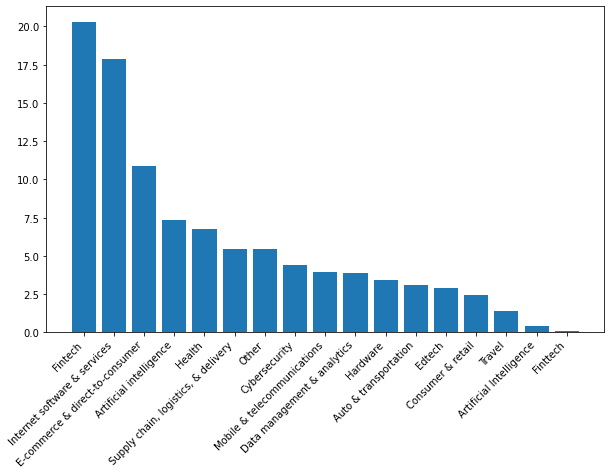

In [12]:
plt.figure(figsize=(10,6))
plt.bar(analise_industry.index,analise_industry);
plt.xticks(rotation = 45,ha='right');

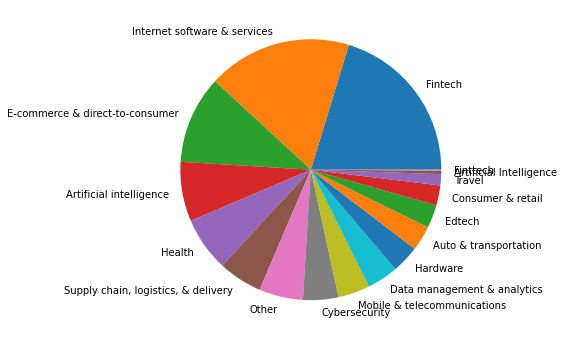

In [13]:
plt.figure(figsize=(10,6))
plt.pie(analise_industry,labels=analise_industry.index);


In [14]:
analise_country = round(data['Country'].value_counts(normalize=True)*100,2)

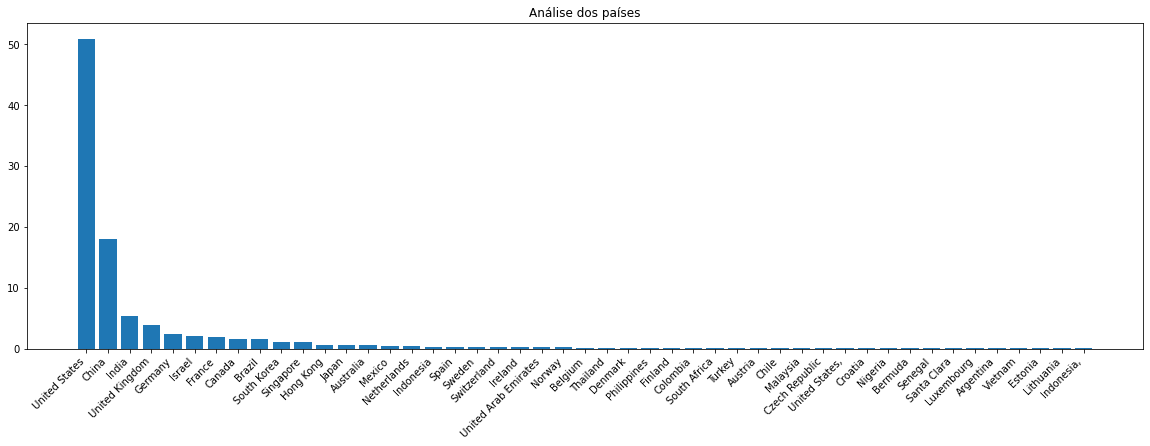

In [15]:
plt.figure(figsize = (20,6))
plt.title('Análise dos países')
plt.bar(analise_country.index,analise_country);
plt.xticks(rotation=45,ha='right');

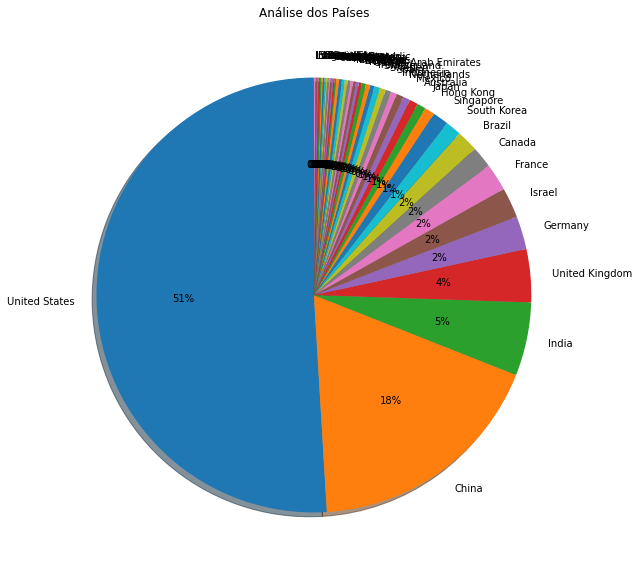

In [16]:
#plot com todos os países geradores de Unicornios
plt.figure(figsize = (10,10))
plt.title("Análise dos Países")
plt.pie(analise_country,labels=analise_country.index,startangle = 90,autopct = "%.0f%%",shadow=True);


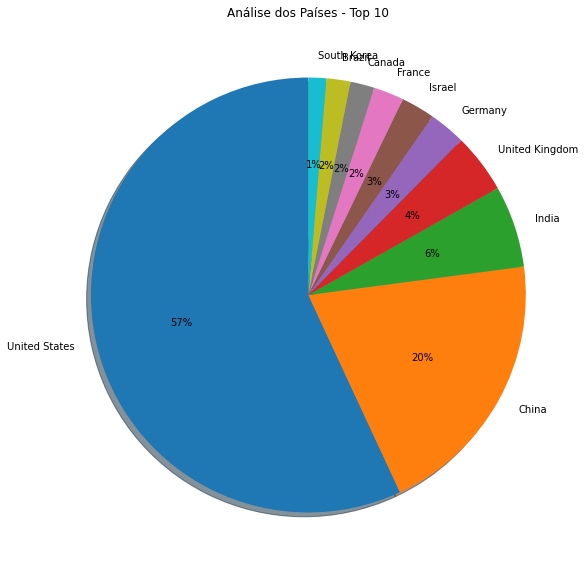

In [17]:
#top 10 dos paises
plt.figure(figsize = (10,10))
plt.title("Análise dos Países - Top 10")
plt.pie(analise_country[:10],labels=analise_country.index[:10],startangle = 90,autopct = "%.0f%%",shadow=True);


### Consertando a data (object to datetime)

In [18]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

In [19]:
data["Month"] = pd.DatetimeIndex(data['Date Joined']).month
data["Year"] = pd.DatetimeIndex(data['Date Joined']).year

In [20]:
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


### Consertando o Valuation

In [21]:
#data["Valuation ($B)"] = [float(value[1:]) for value in data["Valuation ($B)"]]
data["Valuation ($B)"] = data["Valuation ($B)"].apply(lambda linha: float(linha.replace('$','')))

In [22]:
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [23]:
tab_agrupada = data[["Country","Year","Month","Company","Valuation ($B)"]].groupby(["Country","Year","Month","Company","Valuation ($B)"]).count().reset_index()
tab_agrupada

,Country,Year,Month,Company,Valuation ($B)
0,Argentina,2021,8,Uala,2.45
1,Australia,2018,1,Canva,40.00
2,Australia,2019,3,Airwallex,5.50
3,Australia,2021,5,SafetyCulture,1.60
4,Australia,2021,7,Culture Amp,1.50
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1.40
932,United States,2021,12,ReliaQuest,1.00
933,United States,2021,12,YipitData,1.00
934,"United States,",2021,9,TrialSpark,1.00


In [24]:
tab_agrupada.loc[tab_agrupada["Country"] == 'Brazil']

,Country,Year,Month,Company,Valuation ($B)
12,Brazil,2018,3,Nubank,30.00
13,Brazil,2018,7,Movile,1.00
14,Brazil,2018,11,iFood,1.00
15,Brazil,2019,6,Loggi,2.00
16,Brazil,2019,9,QuintoAndar,5.10
17,Brazil,2019,10,EBANX,1.00
18,Brazil,2019,12,Wildlife Studios,3.00
19,Brazil,2020,1,Loft,2.90
20,Brazil,2020,12,C6 Bank,5.05
21,Brazil,2020,12,Creditas,1.75


In [25]:
data.loc[data["Company"] == '1'] #Isso pode ser uma falha de quem forneceu a base de dados. Qual seria o nome dessa empresa? O fornecedor deve ser consultado

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
338,1,2.15,2021-09-08,Brazil,Sao Paulo,Fintech,"Plug and Play Ventures, Valor Capital Group, D...",9,2021
